<a href="https://colab.research.google.com/github/MustofAhmed41/Exercise-Pattern-Prediction/blob/master/Exercise_Pattern_Prediction_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Library

In [174]:
import pandas as pd  
import seaborn as sns  
import numpy as np  
import matplotlib.pyplot as plt

In [175]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [176]:
cd'/content/drive/MyDrive/Colab Notebooks/Dataset/Softcom Assignment 1'

/content/drive/MyDrive/Colab Notebooks/Dataset/Softcom Assignment 1


### Loading Data

In [177]:
#df = pd.read_excel('pml-training.xlsx', index_col=False).drop('Row Number', axis=1).reset_index(drop=True)
df = pd.read_excel('exercise_full_dataset.xlsx').reset_index(drop=True)

In [178]:
print('Column Name', '  No of Missing Values')
for i in zip(df.columns, df.isna().sum()):
  print(i[0], '\t\t', i[1])

Column Name   No of Missing Values
user_name 		 0
raw_timestamp_part_1 		 0
raw_timestamp_part_2 		 0
cvtd_timestamp 		 0
new_window 		 0
num_window 		 0
roll_belt 		 0
pitch_belt 		 0
yaw_belt 		 0
total_accel_belt 		 0
kurtosis_roll_belt 		 38435
kurtosis_picth_belt 		 38475
kurtosis_yaw_belt 		 39242
skewness_roll_belt 		 38434
skewness_roll_belt.1 		 38475
skewness_yaw_belt 		 39242
max_roll_belt 		 38403
max_picth_belt 		 38403
max_yaw_belt 		 38435
min_roll_belt 		 38403
min_pitch_belt 		 38403
min_yaw_belt 		 38435
amplitude_roll_belt 		 38403
amplitude_pitch_belt 		 38403
amplitude_yaw_belt 		 38435
var_total_accel_belt 		 38403
avg_roll_belt 		 38402
stddev_roll_belt 		 38403
var_roll_belt 		 38403
avg_pitch_belt 		 38403
stddev_pitch_belt 		 38403
var_pitch_belt 		 38403
avg_yaw_belt 		 38403
stddev_yaw_belt 		 38403
var_yaw_belt 		 38403
gyros_belt_x 		 0
gyros_belt_y 		 0
gyros_belt_z 		 0
accel_belt_x 		 0
accel_belt_y 		 0
accel_belt_z 		 0
magnet_belt_x 		 0
magnet_belt_

In [179]:
df.head(3)

,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,eurico,1322489729,34670,28/11/2011 14:15,no,1,3.70,41.6,-82.8,3,...,-0.05,-0.37,-0.43,-170.0,155.0,184,-1160.0,1400.0,-876.0,E
1,eurico,1322489729,62641,28/11/2011 14:15,no,1,3.66,42.8,-82.5,2,...,-0.06,-0.37,-0.59,-178.0,164.0,182,-1150.0,1410.0,-871.0,E
2,eurico,1322489729,70653,28/11/2011 14:15,no,1,3.58,43.7,-82.3,1,...,-0.05,-0.27,-0.72,-182.0,172.0,185,-1130.0,1400.0,-863.0,E


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39242 entries, 0 to 39241
Columns: 159 entries, user_name to classe
dtypes: float64(132), int64(23), object(4)
memory usage: 47.6+ MB


In [181]:
df.describe()

,raw_timestamp_part_1,raw_timestamp_part_2,num_window,roll_belt,pitch_belt,yaw_belt,total_accel_belt,kurtosis_roll_belt,kurtosis_picth_belt,kurtosis_yaw_belt,...,var_yaw_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
count,3.924200e+04,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,807.000000,767.000000,0.0,...,839.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000,39242.000000
mean,1.322827e+09,500708.627465,432.322282,64.928120,0.423624,-10.827983,11.378982,-0.181088,4.533324,NaN,...,4702.779079,0.146381,0.095838,0.147643,-63.954814,162.981005,-55.494751,-316.640326,379.762296,395.010309
std,2.040334e+05,288682.935235,247.966725,62.672987,22.400539,94.982455,7.732219,3.739289,11.328069,NaN,...,7224.874200,1.827178,3.735124,1.337704,180.940999,199.580505,137.692832,345.893844,507.055260,368.098954
min,1.322490e+09,280.000000,1.000000,-28.900000,-56.200000,-180.000000,0.000000,-3.333333,-2.210526,NaN,...,0.000000,-339.000000,-7.030000,-52.000000,-498.000000,-690.000000,-458.000000,-1280.000000,-906.000000,-973.000000
25%,1.322673e+09,252299.500000,222.000000,1.100000,1.830000,-88.200000,3.000000,-1.346611,-1.079763,NaN,...,0.251195,-0.220000,-1.450000,-0.180000,-181.000000,53.000000,-181.000000,-620.000000,8.000000,200.000000
50%,1.322833e+09,498781.500000,428.000000,114.000000,5.320000,-11.900000,17.000000,-0.907946,-0.021887,NaN,...,606.510220,0.050000,0.030000,0.080000,-58.000000,200.000000,-40.500000,-385.000000,588.000000,512.000000
75%,1.323084e+09,752287.750000,647.000000,123.000000,15.500000,12.500000,18.000000,-0.282445,4.148419,NaN,...,7648.713645,0.560000,1.650000,0.490000,74.000000,312.000000,25.000000,-77.000000,736.000000,652.000000
max,1.323095e+09,999091.000000,864.000000,162.000000,60.300000,180.000000,30.000000,50.979819,71.000000,NaN,...,39009.333330,4.770000,516.000000,231.000000,479.000000,923.000000,291.000000,672.000000,1480.000000,1090.000000


In [182]:
# sns.set(rc={'figure.figsize':(20,20)})
# sns.heatmap(df.corr())

Data set is imbalanced

In [183]:
df.classe.value_counts()

A    11159
B     7593
E     7214
C     6844
D     6432
Name: classe, dtype: int64

In [184]:
len(df.num_window.value_counts())

861

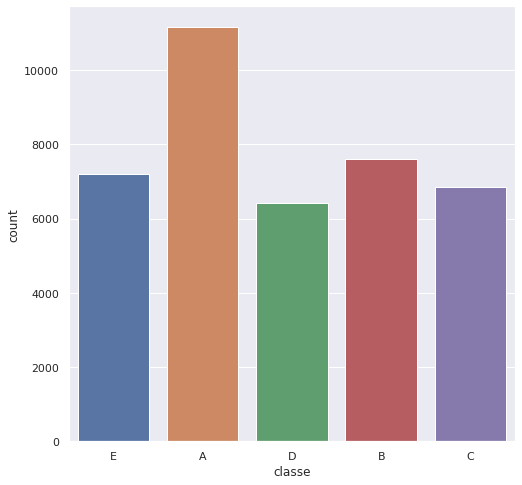

In [185]:
sns.set(rc={'figure.figsize':(8,8)})
sns.countplot(x="classe", data=df)

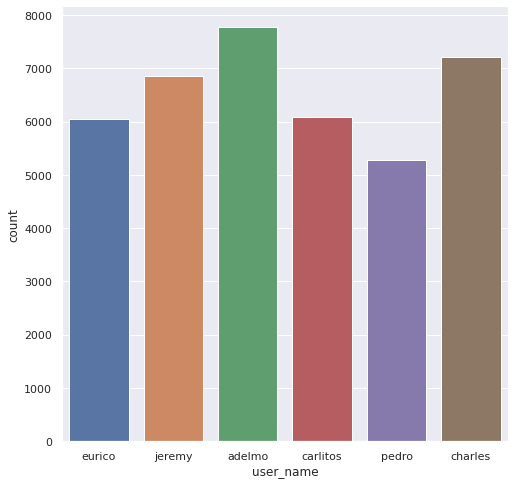

In [186]:
sns.set(rc={'figure.figsize':(8,8)})
sns.countplot(x="user_name", data=df)

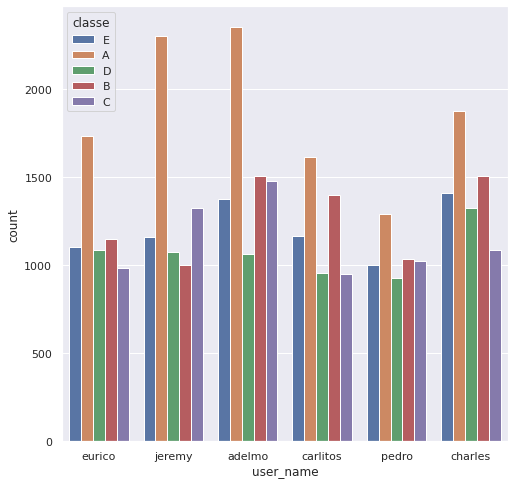

In [187]:
sns.set(rc={'figure.figsize':(8,8)})

sns.countplot(x="user_name", hue='classe', data=df)

### Extracting Time Column


In [188]:
df.rename(columns={'skewness_roll_belt.1':'skewness_pitch_belt'}, inplace=True)

In [189]:
df.drop('cvtd_timestamp', axis = 1, inplace=True)

In [190]:
print(df['raw_timestamp_part_1'].dtype)
print(df['raw_timestamp_part_2'].dtype)

int64
int64


In [191]:
df['raw_timestamp_part_1'] = df['raw_timestamp_part_1'].astype(str)
df['raw_timestamp_part_2'] = df['raw_timestamp_part_2'].astype(str)

In [192]:
def concatenate_zero(val):
  if len(val) <6:
    return val + '0'
  else:
    return val

In [193]:
df['raw_timestamp_part_2'] = df['raw_timestamp_part_2'].apply(concatenate_zero)

In [194]:
print(df['raw_timestamp_part_1'].dtype)
print(df['raw_timestamp_part_2'].dtype)

object
object


In [195]:
df['raw_timestamp_part_2'].head(10)

0    346700
1    626410
2    706530
3    826540
4    906370
5    170626
6    190665
7    242723
8    267551
9    274689
Name: raw_timestamp_part_2, dtype: object

In [196]:
df["Converted Time"]= df["raw_timestamp_part_1"].str.cat(df['raw_timestamp_part_2'])

In [197]:
df['Converted Time'].head(10)

0    1322489729346700
1    1322489729626410
2    1322489729706530
3    1322489729826540
4    1322489729906370
5    1322489729170626
6    1322489729190665
7    1322489729242723
8    1322489729267551
9    1322489729274689
Name: Converted Time, dtype: object

In [198]:
import datetime

def convert_unix_epoch(epoch_time):
  epoch_time = int(epoch_time)
  dt = datetime.datetime.fromtimestamp(epoch_time/1000000)
  return dt.strftime("%Y-%m-%d %H:%M:%S.%f %p")+'';

In [199]:
convert_unix_epoch(1322489729170626)

'2011-11-28 14:15:29.170626 PM'

In [200]:
df['Converted Time'] = df['Converted Time'].apply(convert_unix_epoch)

In [201]:
df['Converted Time'].iloc[90:100]

90    2011-11-30 17:12:46.228110 PM
91    2011-11-30 17:12:46.306380 PM
92    2011-12-02 13:35:38.243240 PM
93    2011-12-02 13:35:38.243680 PM
94    2011-12-02 13:35:38.443900 PM
95    2011-12-02 13:35:38.643240 PM
96    2011-12-02 13:35:38.643720 PM
97    2011-12-02 13:35:38.762940 PM
98    2011-12-02 13:35:38.763330 PM
99    2011-12-02 13:35:38.883040 PM
Name: Converted Time, dtype: object

In [202]:
def extract_miliseconds(val):
    val = str(val)
    return val[17:26]

In [203]:
df['Converted Seconds'] = df['Converted Time'].apply(extract_miliseconds)

In [204]:
df['Converted Seconds'].iloc[10:20]

10    29.286648
11    29.306662
12    29.306720
13    29.334711
14    29.334829
15    29.334850
16    29.346636
17    29.346676
18    29.358632
19    29.358670
Name: Converted Seconds, dtype: object

In [205]:
df['Converted Seconds'].iloc[90:100]

90    46.228110
91    46.306380
92    38.243240
93    38.243680
94    38.443900
95    38.643240
96    38.643720
97    38.762940
98    38.763330
99    38.883040
Name: Converted Seconds, dtype: object

### DO Data Analysis here

In [206]:
df1 = df.copy()

In [207]:
df1['Converted Seconds']

0        29.346700
1        29.626410
2        29.706530
3        29.826540
4        29.906370
           ...    
39237    37.596287
39238    37.636283
39239    37.672400
39240    37.964299
39241    37.972293
Name: Converted Seconds, Length: 39242, dtype: object

In [208]:
df1.drop(['user_name', 'raw_timestamp_part_1', 'raw_timestamp_part_2', 'user_name', 'new_window', 'num_window', 'Converted Seconds', 'Converted Time',
          'kurtosis_yaw_belt', 'skewness_yaw_belt', 'kurtosis_yaw_dumbbell', 'skewness_yaw_dumbbell', 'kurtosis_yaw_forearm', 'skewness_yaw_forearm','skewness_pitch_belt',                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
          'roll_belt','pitch_belt', 'yaw_belt', 'total_accel_belt','gyros_belt_x','gyros_belt_y','gyros_belt_z','accel_belt_x', 'accel_belt_y', 'accel_belt_z','magnet_belt_x', 'magnet_belt_y', 'magnet_belt_z', 
          'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm', 'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x',   'accel_arm_y',  'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y', 'magnet_arm_z',
          'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell', 'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y', 'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y', 'accel_dumbbell_z',  'magnet_dumbbell_x', 'magnet_dumbbell_y', 'magnet_dumbbell_z', 
          'roll_forearm', 'pitch_forearm', 'yaw_forearm', 'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z', 'accel_forearm_x', 'accel_forearm_y', 'accel_forearm_z', 'magnet_forearm_x', 'magnet_forearm_y', 'magnet_forearm_z' ] ,axis=1).columns

Index(['kurtosis_roll_belt', 'kurtosis_picth_belt', 'skewness_roll_belt',
       'max_roll_belt', 'max_picth_belt', 'max_yaw_belt', 'min_roll_belt',
       'min_pitch_belt', 'min_yaw_belt', 'amplitude_roll_belt',
       'amplitude_pitch_belt', 'amplitude_yaw_belt', 'var_total_accel_belt',
       'avg_roll_belt', 'stddev_roll_belt', 'var_roll_belt', 'avg_pitch_belt',
       'stddev_pitch_belt', 'var_pitch_belt', 'avg_yaw_belt',
       'stddev_yaw_belt', 'var_yaw_belt', 'var_accel_arm', 'avg_roll_arm',
       'stddev_roll_arm', 'var_roll_arm', 'avg_pitch_arm', 'stddev_pitch_arm',
       'var_pitch_arm', 'avg_yaw_arm', 'stddev_yaw_arm', 'var_yaw_arm',
       'kurtosis_roll_arm', 'kurtosis_picth_arm', 'kurtosis_yaw_arm',
       'skewness_roll_arm', 'skewness_pitch_arm', 'skewness_yaw_arm',
       'max_roll_arm', 'max_picth_arm', 'max_yaw_arm', 'min_roll_arm',
       'min_pitch_arm', 'min_yaw_arm', 'amplitude_roll_arm',
       'amplitude_pitch_arm', 'amplitude_yaw_arm', 'kurtosis_roll_dumbb

In [209]:
print(df1['kurtosis_roll_belt'].nunique())
print(df1['num_window'].nunique())
print('Number of Empty Values : ', df1['kurtosis_roll_belt'].isnull().sum(axis = 0))
print('Number of Empty Values : ', df1['num_window'].isnull().sum(axis = 0))

791
861
Number of Empty Values :  38435
Number of Empty Values :  0


In [210]:
for i in range(1,865,1):
    val = df1[ (df1['new_window'] == 'yes') & (df1['num_window'] == i) ]['kurtosis_roll_belt']
    for j in val:
      df1.loc[ df1['num_window'] == i , 'kurtosis_roll_belt' ] = j

In [211]:
print(df1['kurtosis_roll_belt'].nunique())
print(df1['num_window'].nunique())
print('Number of Empty Values : ', df1['kurtosis_roll_belt'].isnull().sum(axis = 0))
print('Number of Empty Values : ', df1['num_window'].isnull().sum(axis = 0))

789
861
Number of Empty Values :  1706
Number of Empty Values :  0


In [212]:
for j in df1.drop(['user_name', 'raw_timestamp_part_1', 'raw_timestamp_part_2', 'user_name', 'new_window', 'num_window', 'Converted Seconds', 'Converted Time', 
          'kurtosis_yaw_belt', 'skewness_yaw_belt', 'kurtosis_yaw_dumbbell', 'skewness_yaw_dumbbell', 'kurtosis_yaw_forearm', 'skewness_yaw_forearm','skewness_pitch_belt',
          'roll_belt','pitch_belt', 'yaw_belt', 'total_accel_belt','gyros_belt_x','gyros_belt_y','gyros_belt_z','accel_belt_x', 'accel_belt_y', 'accel_belt_z','magnet_belt_x', 'magnet_belt_y', 'magnet_belt_z', 
          'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm', 'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x',   'accel_arm_y',  'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y', 'magnet_arm_z',
          'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell', 'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y', 'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y', 'accel_dumbbell_z',  'magnet_dumbbell_x', 'magnet_dumbbell_y', 'magnet_dumbbell_z', 
          'roll_forearm', 'pitch_forearm', 'yaw_forearm', 'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z', 'accel_forearm_x', 'accel_forearm_y', 'accel_forearm_z', 'magnet_forearm_x', 'magnet_forearm_y', 'magnet_forearm_z' ] ,axis=1).columns:
  for i in range(1,865,1):
    val = df1[ (df1['new_window'] == 'yes') & (df1['num_window'] == i) ][j]
    for k in val:
      df1.loc[(df1['num_window'] == i), j] = k


In [213]:
df2 = df1.copy()

In [214]:
print('Column Name', '  No of Missing Values')
for i in zip(df2.columns, df2.isna().sum()):
  print(i[0], '\t\t', i[1])

Column Name   No of Missing Values
user_name 		 0
raw_timestamp_part_1 		 0
raw_timestamp_part_2 		 0
new_window 		 0
num_window 		 0
roll_belt 		 0
pitch_belt 		 0
yaw_belt 		 0
total_accel_belt 		 0
kurtosis_roll_belt 		 1706
kurtosis_picth_belt 		 3556
kurtosis_yaw_belt 		 39242
skewness_roll_belt 		 1703
skewness_pitch_belt 		 38475
skewness_yaw_belt 		 39242
max_roll_belt 		 432
max_picth_belt 		 432
max_yaw_belt 		 1706
min_roll_belt 		 432
min_pitch_belt 		 432
min_yaw_belt 		 1706
amplitude_roll_belt 		 432
amplitude_pitch_belt 		 432
amplitude_yaw_belt 		 1706
var_total_accel_belt 		 432
avg_roll_belt 		 432
stddev_roll_belt 		 432
var_roll_belt 		 432
avg_pitch_belt 		 432
stddev_pitch_belt 		 432
var_pitch_belt 		 432
avg_yaw_belt 		 432
stddev_yaw_belt 		 432
var_yaw_belt 		 432
gyros_belt_x 		 0
gyros_belt_y 		 0
gyros_belt_z 		 0
accel_belt_x 		 0
accel_belt_y 		 0
accel_belt_z 		 0
magnet_belt_x 		 0
magnet_belt_y 		 0
magnet_belt_z 		 0
roll_arm 		 0
pitch_arm 		 0
yaw_

In [215]:
df2[ df2['max_roll_belt'].isna()][['max_roll_belt','num_window','roll_belt']]

,max_roll_belt,num_window,roll_belt
978,NaN,24,0.85
979,NaN,24,0.87
980,NaN,24,0.85
981,NaN,24,0.85
982,NaN,24,0.86
...,...,...,...
36582,NaN,806,0.99
36583,NaN,806,1.03
38708,NaN,852,1.21
38709,NaN,852,1.22


In [216]:
for i in df2[df2['max_roll_belt'].isna()]['num_window'].unique():
  max_val = df2[(df2['num_window'] == i)]['roll_belt'].max()
  df2.loc[ (df2['num_window'] == i) ,'max_roll_belt' ] = max_val

In [217]:
df2[ df2['max_roll_belt'].isna()][['max_roll_belt','num_window','roll_belt']]

,max_roll_belt,num_window,roll_belt


In [218]:
empty_max_cols = ['max_roll_belt', 'max_picth_belt',  'max_yaw_belt', 
            'max_roll_arm', 'max_picth_arm', 'max_yaw_arm', 
            'max_roll_dumbbell', 'max_picth_dumbbell', 'max_yaw_dumbbell',
            'max_roll_forearm', 'max_picth_forearm', 'max_yaw_forearm'
            ]

empty_min_cols = ['min_roll_belt', 'min_pitch_belt',  'min_yaw_belt', 
            'min_roll_arm', 'min_pitch_arm', 'min_yaw_arm', 
            'min_roll_dumbbell', 'min_pitch_dumbbell', 'min_yaw_dumbbell',
            'min_roll_forearm', 'min_pitch_forearm', 'min_yaw_forearm'
            ]

empty_avg_cols = ['avg_roll_belt', 'avg_pitch_belt',  'avg_yaw_belt', 
            'avg_roll_arm', 'avg_pitch_arm', 'avg_yaw_arm', 
            'avg_roll_dumbbell', 'avg_pitch_dumbbell', 'avg_yaw_dumbbell',
            'avg_roll_forearm', 'avg_pitch_forearm', 'avg_yaw_forearm'
            ]

empty_var_cols = ['var_roll_belt', 'var_pitch_belt',  'var_yaw_belt', 
            'var_roll_arm', 'var_pitch_arm', 'var_yaw_arm', 
            'var_roll_dumbbell', 'var_pitch_dumbbell', 'var_yaw_dumbbell',
            'var_roll_forearm', 'var_pitch_forearm', 'var_yaw_forearm'
            ]

empty_std_cols = ['stddev_roll_belt', 'stddev_pitch_belt',  'stddev_yaw_belt', 
            'stddev_roll_arm', 'stddev_pitch_arm', 'stddev_yaw_arm', 
            'stddev_roll_dumbbell', 'stddev_pitch_dumbbell', 'stddev_yaw_dumbbell',
            'stddev_roll_forearm', 'stddev_pitch_forearm', 'stddev_yaw_forearm'
            ]

empty_kurtosis_cols = ['kurtosis_roll_belt', 'kurtosis_pitch_belt',  'kurtosis_yaw_belt', 
            'kurtosis_roll_arm', 'kurtosis_pitch_arm', 'kurtosis_yaw_arm', 
            'kurtosis_roll_dumbbell', 'kurtosis_pitch_dumbbell', 'kurtosis_yaw_dumbbell',
            'kurtosis_roll_forearm', 'kurtosis_pitch_forearm', 'kurtosis_yaw_forearm'
            ]   


empty_kurtosis_cols = ['kurtosis_roll_belt', 'kurtosis_picth_belt',  'kurtosis_yaw_belt', 
            'kurtosis_roll_arm', 'kurtosis_picth_arm', 'kurtosis_yaw_arm', 
            'kurtosis_roll_dumbbell', 'kurtosis_picth_dumbbell', 'kurtosis_yaw_dumbbell',
            'kurtosis_roll_forearm', 'kurtosis_picth_forearm', 'kurtosis_yaw_forearm'
            ]

empty_skew_cols = ['skewness_roll_belt', 'skewness_pitch_belt',  'skewness_yaw_belt', 
            'skewness_roll_arm', 'skewness_pitch_arm', 'skewness_yaw_arm', 
            'skewness_roll_dumbbell', 'skewness_pitch_dumbbell', 'skewness_yaw_dumbbell',
            'skewness_roll_forearm', 'skewness_pitch_forearm', 'skewness_yaw_forearm'
            ]   


attributes = [
              'roll_belt','pitch_belt','yaw_belt',
              'roll_arm', 'pitch_arm', 'yaw_arm',
              'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell',
              'roll_forearm', 'pitch_forearm', 'yaw_forearm',
              ]

In [219]:
for j in zip(empty_max_cols, attributes):
  for i in df2[df2[j[0]].isna()]['num_window'].unique():
    max_val = df2[(df2['num_window'] == i)][j[1]].max()
    df2.loc[ (df2['num_window'] == i) ,j[0] ] = max_val

In [220]:
for j in zip(empty_min_cols, attributes):
  for i in df2[df2[j[0]].isna()]['num_window'].unique():
    min_val = df2[(df2['num_window'] == i)][j[1]].min()
    df2.loc[ (df2['num_window'] == i) ,j[0] ] = min_val

In [221]:
for j in zip(empty_avg_cols, attributes):
  for i in df2[df2[j[0]].isna()]['num_window'].unique():
    mean_val = df2[(df2['num_window'] == i)][j[1]].mean()
    df2.loc[ (df2['num_window'] == i) ,j[0] ] = mean_val

In [222]:
for j in zip(empty_var_cols, attributes):
  for i in df2[df2[j[0]].isna()]['num_window'].unique():
    var_val = df2[(df2['num_window'] == i)][j[1]].var()
    df2.loc[ (df2['num_window'] == i) ,j[0] ] = var_val

In [223]:
for j in zip(empty_std_cols, attributes):
  for i in df2[df2[j[0]].isna()]['num_window'].unique():
    std_val = df2[(df2['num_window'] == i)][j[1]].std()
    df2.loc[ (df2['num_window'] == i) ,j[0] ] = std_val

In [224]:
for j in zip(empty_kurtosis_cols, attributes):
  for i in df2[df2[j[0]].isna()]['num_window'].unique():
    std_val = df2[(df2['num_window'] == i)][j[1]].kurtosis()
    df2.loc[ (df2['num_window'] == i) ,j[0] ] = std_val

In [225]:
for j in zip(empty_skew_cols, attributes):
  for i in df2[df2[j[0]].isna()]['num_window'].unique():
    std_val = df2[(df2['num_window'] == i)][j[1]].skew()
    df2.loc[ (df2['num_window'] == i) ,j[0] ] = std_val

In [226]:
print('Column Name', '  No of Missing Values\n')
for i in zip(df2.columns, df2.isna().sum()):
  print(i[0], '\t\t', i[1])

Column Name   No of Missing Values

user_name 		 0
raw_timestamp_part_1 		 0
raw_timestamp_part_2 		 0
new_window 		 0
num_window 		 0
roll_belt 		 0
pitch_belt 		 0
yaw_belt 		 0
total_accel_belt 		 0
kurtosis_roll_belt 		 12
kurtosis_picth_belt 		 12
kurtosis_yaw_belt 		 12
skewness_roll_belt 		 6
skewness_pitch_belt 		 6
skewness_yaw_belt 		 6
max_roll_belt 		 0
max_picth_belt 		 0
max_yaw_belt 		 0
min_roll_belt 		 0
min_pitch_belt 		 0
min_yaw_belt 		 0
amplitude_roll_belt 		 432
amplitude_pitch_belt 		 432
amplitude_yaw_belt 		 1706
var_total_accel_belt 		 432
avg_roll_belt 		 0
stddev_roll_belt 		 2
var_roll_belt 		 2
avg_pitch_belt 		 0
stddev_pitch_belt 		 2
var_pitch_belt 		 2
avg_yaw_belt 		 0
stddev_yaw_belt 		 2
var_yaw_belt 		 2
gyros_belt_x 		 0
gyros_belt_y 		 0
gyros_belt_z 		 0
accel_belt_x 		 0
accel_belt_y 		 0
accel_belt_z 		 0
magnet_belt_x 		 0
magnet_belt_y 		 0
magnet_belt_z 		 0
roll_arm 		 0
pitch_arm 		 0
yaw_arm 		 0
total_accel_arm 		 0
var_accel_arm 		 43

In [227]:
df1.to_csv('Preprocessed_Exercise.csv')

# Read Data

In [228]:
df1 = pd.read_csv('Preprocessed_Exercise.csv')

## Preparing for machine learning model

In [229]:
#removing as empty isn't needed by ML models
#df1.drop(['Converted Time', 'Converted Seconds', 'raw_timestamp_part_1', 'raw_timestamp_part_2', 'user_name', 'new_window', 'num_window'] ,axis=1, inplace = True)

In [230]:
from matplotlib.figure import Figure

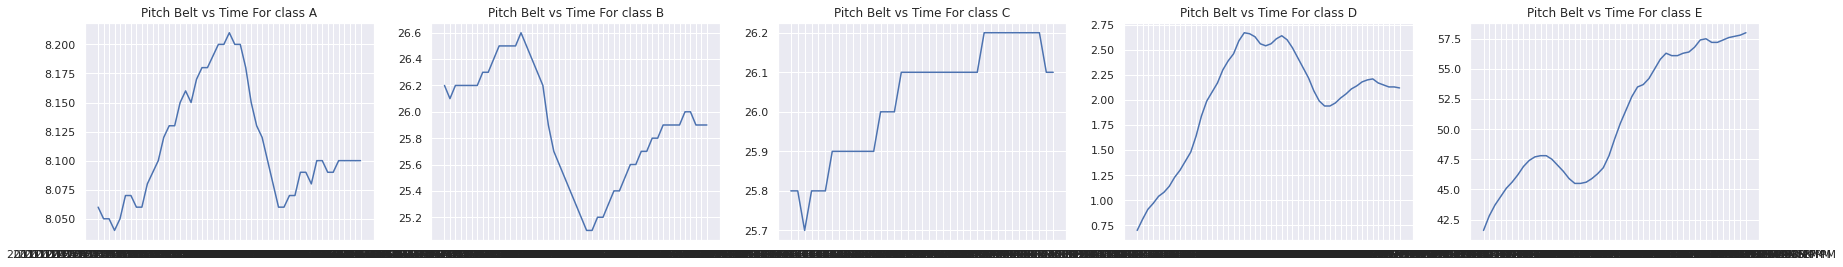

In [231]:
classes = ['A', 'B', 'C', 'D', 'E']
windows = [12, 80, 90, 294, 1]

fig = plt.subplots(figsize = (30, 4))

count = 1
for i in zip(classes,windows):
  plt.subplot(1, 5, count)
  plt.plot(df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['Converted Time'],
      df1[ (df1['classe'] == i[0]) & (df1['num_window'] == i[1]) ]['pitch_belt'])
  s = "Pitch Belt vs Time For class " +  i[0]
  plt.title(s)  
  count += 1  

plt.show()